In [1]:
import numpy as np
import DNN_model as dnn 

In [2]:
m_train = 1000
m_test = 200
n_x = 1000
x_train = np.random.rand(n_x, m_train)
x_test = np.random.rand(n_x, m_test)

# layer_dims is the number of nodes in each layer, NOT including the input layers
# layers_dims = [25, 7, 5, 1] 
# this would be a DNN of n_X -> 25 -> 7 -> 5 -> 1
# if number of nodes in last layer is > 1, we expect a multi class output
layer_dims = [10, 10, 10, 5] 
isBinary = layer_dims[-1] <= 2 

if isBinary:
    assert(layer_dims[-1] == 1)
    y_train = np.random.randint(2, size=(1, m_train))
    y_test = np.random.randint(2, size=(1, m_test))
else:
    # Multi class
    assert(layer_dims[-1] > 1)
    y_train = np.random.randint(layer_dims[-1], size=(1, m_train))[0]
    y_train = dnn.one_hot_matrix(y_train, layer_dims[-1], axis = 0)
    
    y_test = np.random.randint(layer_dims[-1], size=(1, m_test))[0]
    y_test = dnn.one_hot_matrix(y_test, layer_dims[-1], axis = 0)

Cost after epoch 0: 1.803229


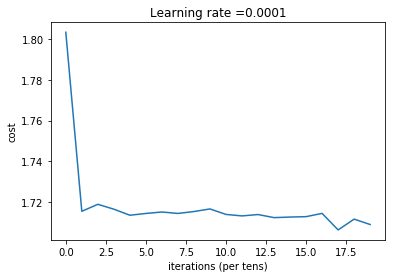

Parameters have been trained!
('Train Accuracy:', 0.226)
('Test Accuracy:', 0.245)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [3]:
result = dnn.train(x_train, y_train, x_test, y_test, layer_dims, keep_prob=0.5, num_epochs=100)
resPredict = result[0]
prediction = dnn.predict(x_train, result[1], isBinary)


In [4]:
print resPredict

[ 0.  0.  0.  0.  0.  2.  3.  0.  0.  3.  0.  0.  2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  0.  0.  0.  3.  3.  0.  0.  0.  0.  0.  0.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  3.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [5]:
print prediction

[ 0.  0.  0.  0.  0.  2.  3.  0.  0.  3.  0.  0.  2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  0.  0.  0.  3.  3.  0.  0.  0.  0.  0.  0.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  3.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0